In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
import scipy.stats as stats

df = pd.read_csv('amz_uk_price_prediction_dataset.csv')
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


PART 1:

In [3]:
#Create a crosstab between the product `category` and the `isBestSeller` status.

In [4]:
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

print(crosstab)

isBestSeller                    False  True 
category                                    
3D Printers                       247      1
3D Printing & Scanning           4065      2
Abrasive & Finishing Products     245      5
Action Cameras                   1696      1
Adapters                          251      3
...                               ...    ...
Wind Instruments                  243      7
Window Treatments                 234      5
Women                           17559    213
Women's Sports & Outdoor Shoes   1939     20
eBook Readers & Accessories       246      0

[296 rows x 2 columns]


In [5]:
#Are there categories where being a best-seller is more prevalent?

In [6]:
# Calculate the proportion of best-sellers in each category
# True in crosstab corresponds to best-sellers, False to non-best-sellers
crosstab['proportion_best_sellers'] = crosstab[True] / (crosstab[True] + crosstab[False])

# Sort by the proportion of best-sellers in descending order
sorted_crosstab = crosstab.sort_values(by='proportion_best_sellers', ascending=False)

# Display the sorted result
sorted_crosstab[['proportion_best_sellers']]

isBestSeller,proportion_best_sellers
category,
Grocery,0.058135
Smart Home Security & Lighting,0.057692
Health & Personal Care,0.057686
Mobile Phone Accessories,0.042471
Power & Hand Tools,0.035339
...,...
"CD, Disc & Tape Players",0.000000
General Music-Making Accessories,0.000000
Snowboard Boots,0.000000


It seems that Grocery (0.058135); Smart Home Security & Lighting (0.057692); Health & Personal Care (0.057686) are the categories that have the best proportion of best sellers

In [8]:
#Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.

In [9]:
# Chi-square test for 'MSZoning' and 'SaleCondition'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(sorted_crosstab)

chi2_statistic, chi2_p_value

(36684.23786636857, 0.0)

In [10]:
#Compute Cramér's V to understand the strength of association between best-seller status and category.

In [11]:
# Assuming you have a contingency table with integer counts from 'df'
contingency_table = pd.crosstab(df['category'], df['isBestSeller'])

# Step 1: Perform the Chi-square test to get the Chi-square statistic
chi2_stat, p, dof, expected = chi2_contingency(contingency_table)

# Step 2: Calculate Cramér's V
n = contingency_table.sum().sum()  # Total number of observations
cramers_v = np.sqrt(chi2_stat / (n * (min(contingency_table.shape) - 1)))

# Step 3: Display Cramér's V
print(f"Cramér's V: {cramers_v}")


Cramér's V: 0.1222829439760564


In [12]:
# Computing the association between variables in 'sorted_crosstab' using the "cramer" method
# Association(sorted_crosstab, method="cramer")

In [13]:
# Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

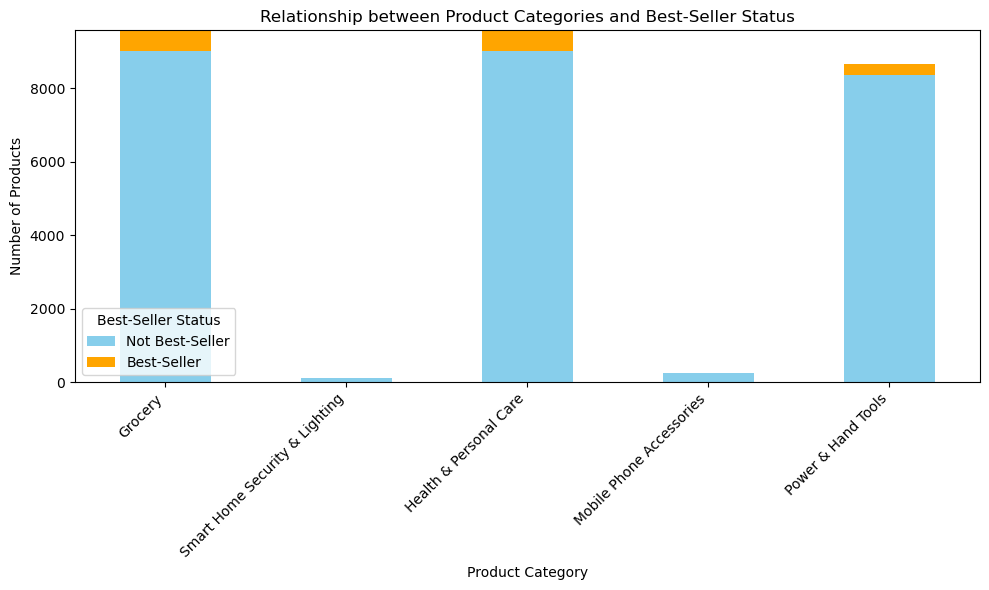

In [14]:
sorted_crosstab[:5].plot(kind='bar', stacked=True, color=['skyblue', 'orange'], figsize=(10,6))

plt.title('Relationship between Product Categories and Best-Seller Status')
plt.xlabel('Product Category')
plt.ylabel('Number of Products')
plt.legend(title='Best-Seller Status', labels=['Not Best-Seller', 'Best-Seller'])
plt.xticks(rotation=45, ha='right')

# Step 4: Show the plot
plt.tight_layout()
plt.show()


PART 2

In [37]:
# 0. **Preliminary Step: Remove outliers in product prices.**

In [39]:
# Step 1: Calculate Q1 and Q3
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Step 2: Calculate IQR
IQR = Q3 - Q1

# Step 3: Calculate bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Filter the DataFrame
filtered_df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

filtered_df


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [49]:
#1. **Violin Plots**:

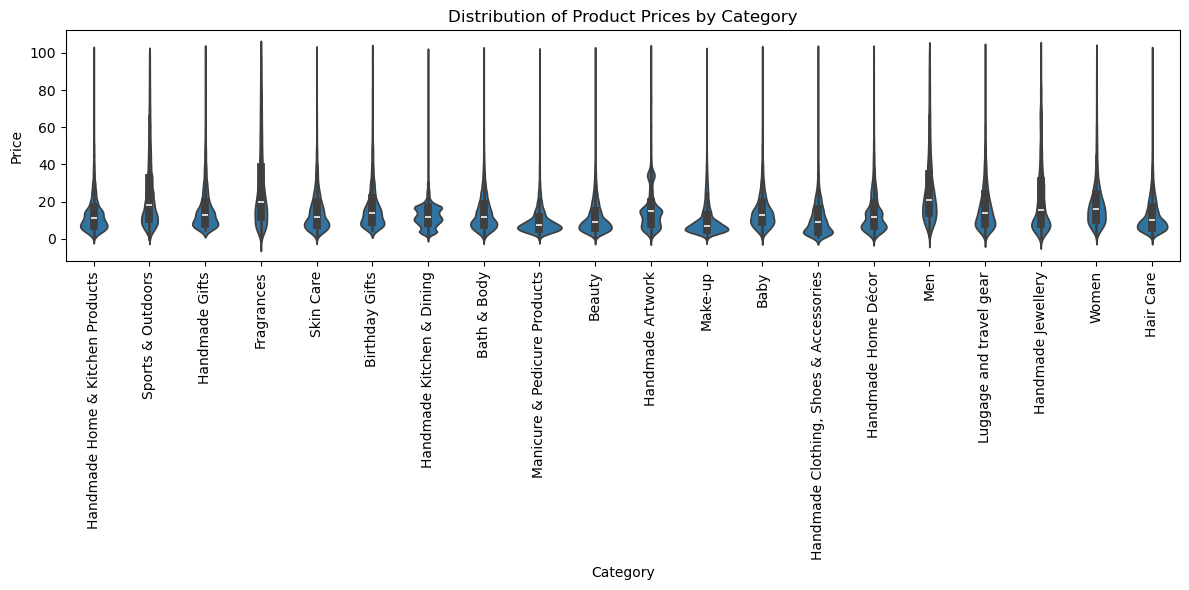

Category with the highest median price:
category    Desktop PCs
price              74.0
Name: 75, dtype: object


In [47]:
# Step 1: Calculate median price for each category
median_prices = filtered_df.groupby('category')['price'].median().reset_index()

# Identify the category with the highest median price
highest_median_category = median_prices.loc[median_prices['price'].idxmax()]

# Step 2: Count products in each category
category_counts = filtered_df['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']

# Filter top 20 categories
top_categories = category_counts.nlargest(20, 'count')['category']
top_filtered_df = filtered_df[filtered_df['category'].isin(top_categories)]

# Step 3: Create the violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='category', y='price', data=top_filtered_df)
plt.title('Distribution of Product Prices by Category')
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.xlabel('Category')
plt.tight_layout()
plt.show()

# Display the category with the highest median price
print("Category with the highest median price:")
print(highest_median_category)

In [53]:
#2. **Bar Charts**:

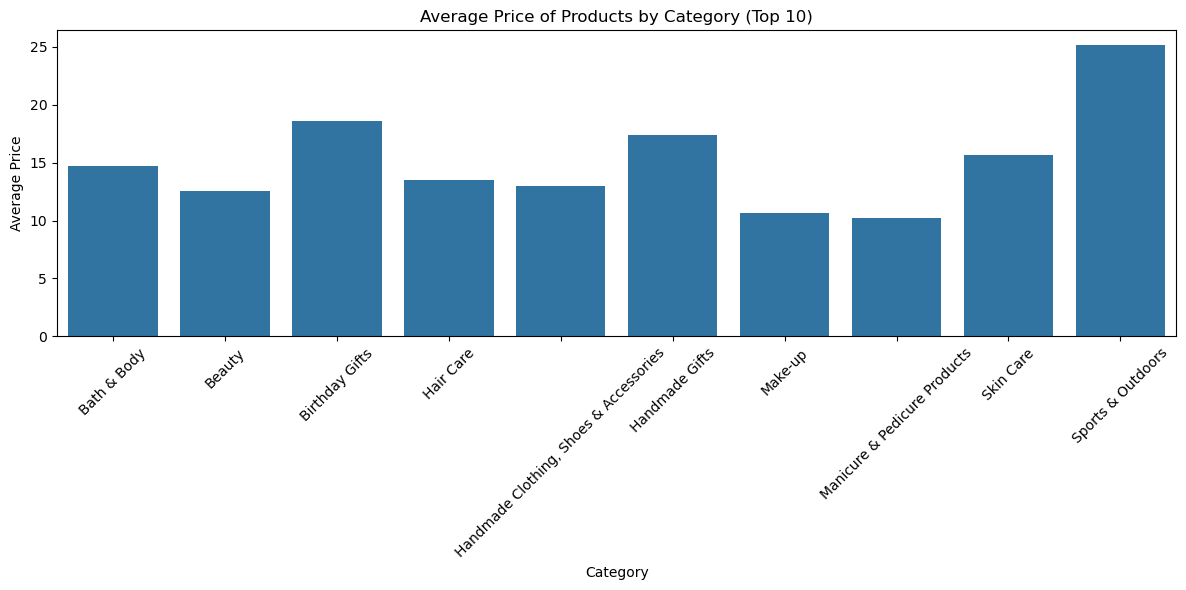

Category with the highest average price:
category    Motherboards
price          68.772432
Name: 190, dtype: object


In [51]:
# Step 1: Calculate average price for each category
average_prices = filtered_df.groupby('category')['price'].mean().reset_index()

# Identify the category with the highest average price
highest_average_category = average_prices.loc[average_prices['price'].idxmax()]

# Step 2: Count products in each category
category_counts = filtered_df['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']

# Get top 10 categories based on count
top_categories = category_counts.nlargest(10, 'count')['category']
top_average_prices = average_prices[average_prices['category'].isin(top_categories)]

# Step 3: Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='price', data=top_average_prices)
plt.xticks(rotation=45)
plt.title('Average Price of Products by Category (Top 10)')
plt.ylabel('Average Price')
plt.xlabel('Category')
plt.tight_layout()
plt.show()

# Display the category with the highest average price
print("Category with the highest average price:")
print(highest_average_category)

In [ ]:
3. **Box Plots**:

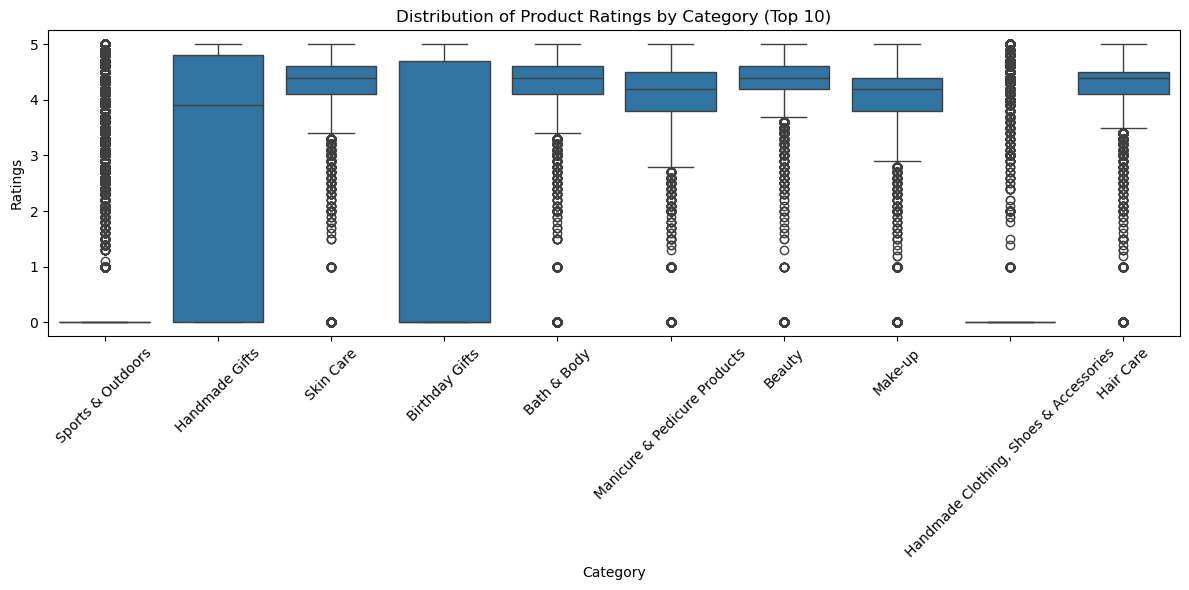

Category with the highest median rating:
category    Computer Memory
stars                   4.7
Name: 56, dtype: object


In [55]:
# Step 1: Calculate median ratings for each category
median_ratings = filtered_df.groupby('category')['stars'].median().reset_index()

# Identify the category with the highest median rating
highest_median_rating_category = median_ratings.loc[median_ratings['stars'].idxmax()]

# Step 2: Count products in each category
category_counts = filtered_df['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']

# Get top 10 categories based on count
top_categories = category_counts.nlargest(10, 'count')['category']
top_filtered_df = filtered_df[filtered_df['category'].isin(top_categories)]

# Step 3: Create the box plots
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='stars', data=top_filtered_df)
plt.xticks(rotation=45)
plt.title('Distribution of Product Ratings by Category (Top 10)')
plt.ylabel('Ratings')
plt.xlabel('Category')
plt.tight_layout()
plt.show()

# Display the category with the highest median rating
print("Category with the highest median rating:")
print(highest_median_rating_category)

PART 3

In [58]:
#1. **Correlation Coefficients**:

In [62]:
# Step 1: Calculate the correlation coefficient
correlation = filtered_df['price'].corr(filtered_df['stars'])

# Step 2: Display the correlation coefficient
print(f"Correlation coefficient between price and stars: {correlation:.2f}")

# Step 3: Interpret the correlation
if correlation > 0.5:
    interpretation = "strong positive correlation"
elif correlation > 0.3:
    interpretation = "moderate positive correlation"
elif correlation > 0:
    interpretation = "weak positive correlation"
elif correlation < -0.3:
    interpretation = "moderate negative correlation"
elif correlation < -0.5:
    interpretation = "strong negative correlation"
else:
    interpretation = "no significant correlation"

print(f"Interpretation: There is a {interpretation} between product price and its rating.")

Correlation coefficient between price and stars: -0.08
Interpretation: There is a no significant correlation between product price and its rating.


In [60]:
#2. **Visualizations**:

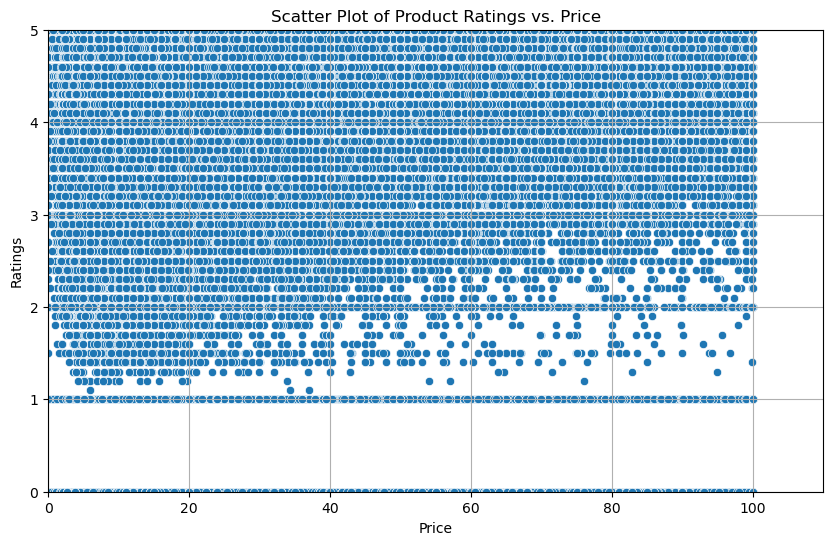

In [64]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='stars', data=filtered_df)
plt.title('Scatter Plot of Product Ratings vs. Price')
plt.xlabel('Price')
plt.ylabel('Ratings')
plt.xlim(0, filtered_df['price'].max() * 1.1)  # Adjust x-axis limit
plt.ylim(0, 5)  # Assuming ratings are out of 5
plt.grid(True)
plt.show()

In [66]:
# Calculate correlation matrix
correlation_matrix = filtered_df.corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'B09B96TG33'

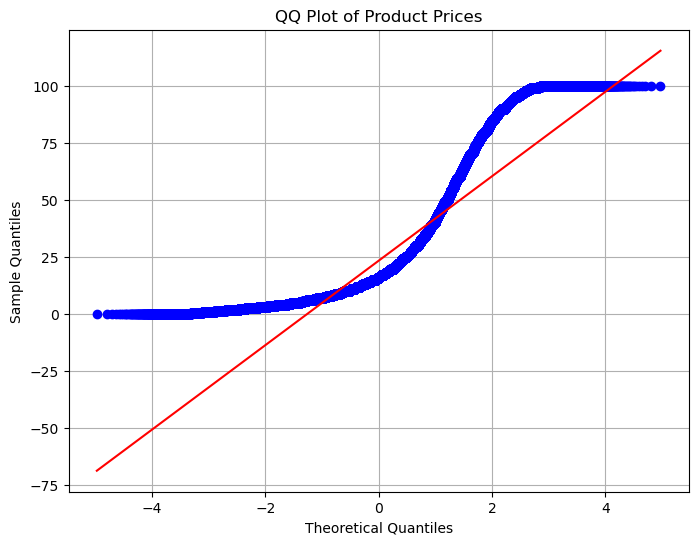

In [72]:
# QQ plot for price distribution
plt.figure(figsize=(8, 6))
stats.probplot(filtered_df['price'], dist="norm", plot=plt)
plt.title('QQ Plot of Product Prices')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()